# Plotting examples
We are going to take some of our clean data from the previous Notebook and visualize it using the [seaborn](https://seaborn.pydata.org) library.

In [6]:
import pandas as pd
import pylab as plt
import os
import seaborn as sns
import re

In [7]:
data_directory = os.path.join("..","Space Data")

In [8]:
# List all the files available with the 'ls' command
from subprocess import check_output
print(check_output(["ls",data_directory]).decode("utf8"))

astronauts.csv
exoplanets.csv
Fireball Reports.csv
Meteorite_Landings.csv
SolarSystemAndEarthquakes.csv
UFO_Sightings_Global.csv



Let's plot some of the UFO sightings data

In [9]:
df = pd.read_csv(os.path.join(data_directory, "UFO_Sightings_Global.csv"))

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [12]:
df.head()

,day_sighted,time,Shape,duration (s),Location,country,description,latitude,longitude,State/Region
0,2019-01-31,21:00:00,light,600.0,"Las vegas, NV",United States,Pink light in sky making light orbs you could ...,36.175,-115.136389,Nevada
1,2019-01-31,20:27:00,other,NaN,"Lumpkin, GA",United States,Unidentifiable shape hovering over field in Lu...,32.0508,-84.799167,Georgia
2,2019-01-31,18:00:00,circle,360.0,"Hollywood, CA",United States,Circular red object with green flashing light ...,34.0983,-118.325833,California
3,2019-01-31,18:00:00,fireball,1200.0,"Albany, OR",United States,Was outside having a smoke while I had seen lo...,44.6367,-123.104722,Oregon
4,2019-01-31,04:30:00,circle,300.0,"Seattle, WA",United States,Small Blue Orb traveling east from Magnolia to...,47.6064,-122.330833,Washington


### Categorical scatterplots

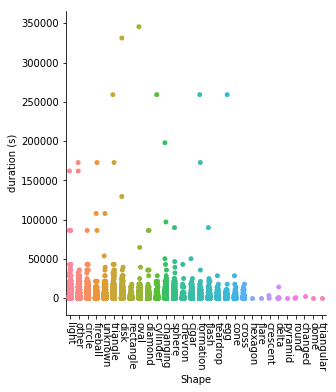

In [12]:
g = sns.catplot(x='Shape', 
                y='duration (s)', 
                data=df)
 
# Rotate x-axis labels
g.set_xticklabels(rotation=-90)

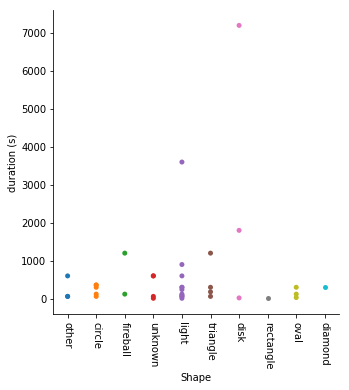

In [21]:
g = sns.catplot(x='Shape', 
                y='duration (s)', 
                data=df[1:50],
                jitter=False) 
g.set_xticklabels(rotation=-90)

### Boxplots

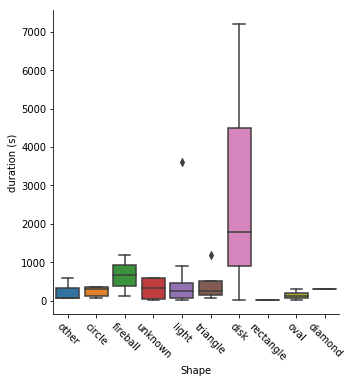

In [20]:
g = sns.catplot(x='Shape', 
                y='duration (s)', 
                data=df[1:50],
                kind="box") 
g.set_xticklabels(rotation=-45)

### Violin Plots

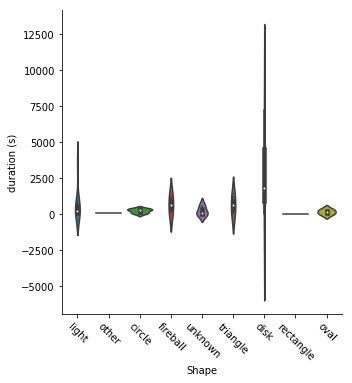

In [24]:
g = sns.catplot(x='Shape', 
                y='duration (s)', 
                data=df[0:40],
                kind="violin") 
g.set_xticklabels(rotation=-45)

Let's take another dataset from the list.

In [43]:
df = pd.read_csv(os.path.join(data_directory, "SolarSystemAndEarthquakes.csv"))

In [44]:
df.head()

,earthquake.time,earthquake.latitude,earthquake.longitude,earthquake.mag,earthquake.place,MoonPhase.dynamic,MoonPhase.value,MoonPhase.total,MoonPhase.percent,MoonPhase.illumination,...,Neptune.housenumber,Pluto.longitude,Pluto.latitude,Pluto.rectascension,Pluto.declination,Pluto.azimuth,Pluto.height,Pluto.speed,Pluto.house,Pluto.housenumber
0,2016-04-29T01:33:38.940Z,10.2705,-103.7150,6.6,Northern East Pacific Rise,dsc,21.102878,29.530588,71.461083,28.538917,...,4.855731,287.456664,1.458687,288.717312,-20.849043,294.602418,-60.711436,-0.004875,62.774958,3.092499
1,2016-04-28T19:33:24.420Z,-16.0743,167.3926,7.0,1km SE of Norsup_Vanuatu,dsc,20.801902,29.530588,70.441882,29.558118,...,10.821472,287.458035,1.458864,288.718743,-20.848692,75.715379,61.913464,-0.005482,242.688552,9.089618
2,2016-04-20T08:33:47.600Z,0.6359,-80.2083,6.2,19km WNW of Muisne_Ecuador,asc,13.041587,29.530588,44.162976,88.325952,...,12.866854,287.484120,1.466467,288.745387,-20.837893,306.628344,52.338472,-0.000961,301.730362,11.057679
3,2016-04-16T23:58:37.280Z,0.3715,-79.9398,7.8,27km SSE of Muisne_Ecuador,asc,10.108874,29.530588,34.231876,68.463751,...,5.254719,287.484562,1.469462,288.745447,-20.834871,322.775621,-63.936274,0.000967,73.503629,3.450121
4,2016-04-15T16:25:06.260Z,32.7820,130.7259,7.0,1km WSW of Kumamoto-shi_Japan,asc,8.803186,29.530588,29.810397,59.620794,...,2.162465,287.483388,1.470527,288.744056,-20.833960,299.716096,6.217801,0.001607,350.113718,12.670457


### Scatterplot

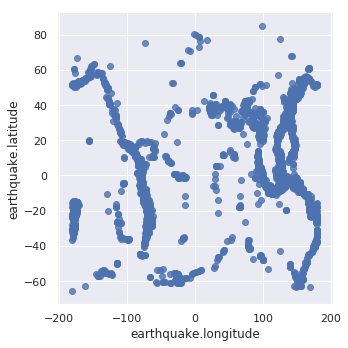

In [45]:
sns.lmplot('earthquake.longitude', 'earthquake.latitude', data=df, fit_reg=False)

### Joint Distribution Plot

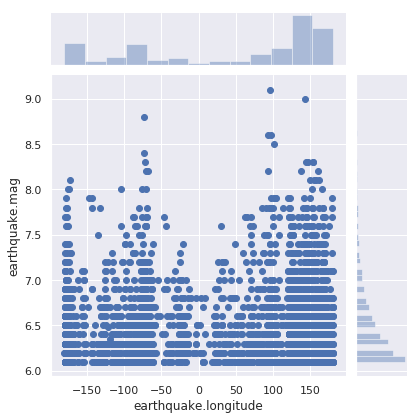

In [47]:
sns.jointplot(x='earthquake.longitude',
              y='earthquake.mag',
              data=df)

We can also plot a linear regression with the marginal distributions and apply some style to the plots.

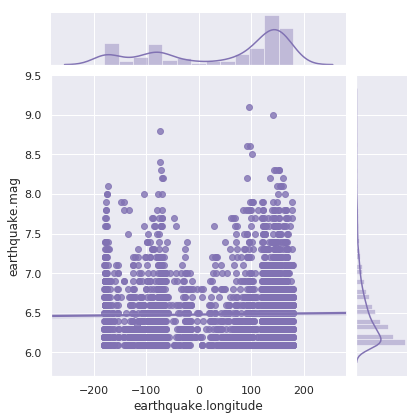

In [31]:
sns.set(style="darkgrid")
sns.jointplot(x='earthquake.longitude',
              y='earthquake.mag',
              kind='reg',
              color="m",
              data=df)

### Barplot

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

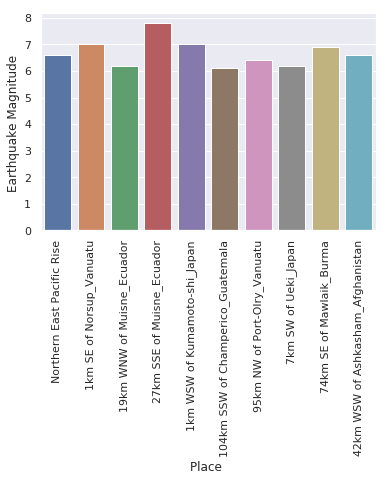

In [32]:
sns.barplot(data = df.head(10),x = 'earthquake.place',y = 'earthquake.mag')
plt.ylabel('Earthquake Magnitude ', fontsize=12)
plt.xlabel('Place ', fontsize=12)
plt.xticks(rotation='vertical')

Text(0,0.5,'Place ')

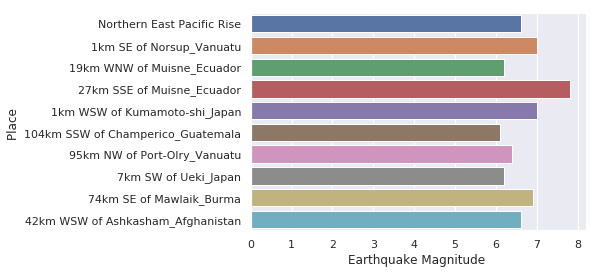

In [33]:
sns.barplot(data = df.head(10),y = 'earthquake.place',x = 'earthquake.mag')
plt.xlabel('Earthquake Magnitude ', fontsize=12)
plt.ylabel('Place ', fontsize=12)

### Density Plot

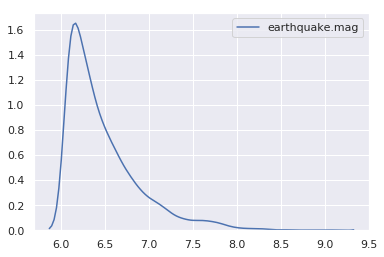

In [34]:
sns.kdeplot(df['earthquake.mag'])

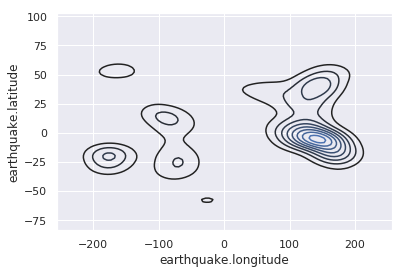

In [46]:
sns.kdeplot(df['earthquake.longitude'], df['earthquake.latitude'])

### Heatmap plot
Heatmaps help you visualize matrix-like data.

Finally let's load the exoplanets data and calculate and visialize the correlation matrix.

In [40]:
df = pd.read_csv(os.path.join(data_directory, "exoplanets.csv"))
df.head()

,loc_rowid,pl_hostname,pl_letter,pl_name,pl_discmethod,pl_pnum,pl_orbper,pl_orbsmax,pl_orbeccen,pl_orbincl,pl_bmassj,pl_bmassprov,pl_radj,pl_dens,st_teff,st_mass,st_rad,rowupdate,pl_facility,last_updated
0,1,11 Com,b,11 Com b,Radial Velocity,1,326.03000,1.29,0.231,NaN,19.40,Msini,NaN,NaN,4742.0,2.70,19.00,2014-05-14,Xinglong Station,2014-05-14
1,2,11 UMi,b,11 UMi b,Radial Velocity,1,516.21997,1.53,0.080,NaN,14.74,Msini,NaN,NaN,4213.0,2.78,29.79,2018-09-06,Thueringer Landessternwarte Tautenburg,2018-09-06
2,3,14 And,b,14 And b,Radial Velocity,1,185.84000,0.83,0.000,NaN,4.80,Msini,NaN,NaN,4813.0,2.20,11.00,2014-05-14,Okayama Astrophysical Observatory,2014-05-14
3,4,14 Her,b,14 Her b,Radial Velocity,1,1773.40002,2.93,0.370,NaN,4.66,Msini,NaN,NaN,5338.0,0.90,0.93,2018-09-06,W. M. Keck Observatory,2018-09-06
4,5,16 Cyg B,b,16 Cyg B b,Radial Velocity,1,798.50000,1.66,0.680,NaN,1.78,Msini,NaN,NaN,5750.0,1.08,1.13,2018-09-06,Multiple Observatories,2018-09-06


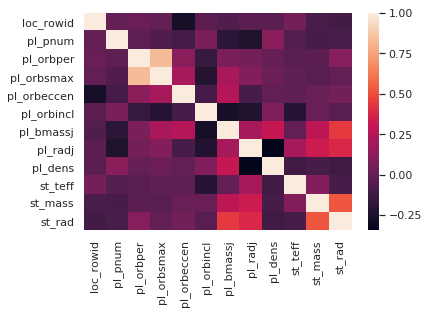

In [41]:
# Calculate correlations
corr = df.corr()
 
# Heatmap
sns.heatmap(corr)

## CHALLENGE (Easy):  Which Undergrad Major and military rank has more time in space. Show it in a single bar plot 

In [ ]:
## your code here

## CHALLENGE: Create a lat vs long scatter plot showing UFO sightings and Firewall landings in different colors.

In [42]:
## your code here